# Курс "Введение в Data Science и машинное обучение"

## Задачи второго модуля "Решающие деревья"

https://stepik.org/lesson/209690/step/1?unit=183194

In [1]:
import pandas as pd
import numpy as np
from IPython.display import Image

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import precision_score, recall_score

In [23]:
data = pd.DataFrame({'X_1': [1, 1, 1, 0, 0, 0, 0, 1], 'X_2': [0, 0, 0, 1, 0, 0, 0, 1], 'Y': [1, 1, 1, 1, 0, 0, 0, 0]})

In [3]:
data

,X_1,X_2,Y
0,1,0,1
1,1,0,1
2,1,0,1
3,0,1,1
4,0,0,0
5,0,0,0
6,0,0,0
7,1,1,0


In [4]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy')

In [5]:
X = data[['X_1', 'X_2']]

In [6]:
y = data.Y

In [7]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

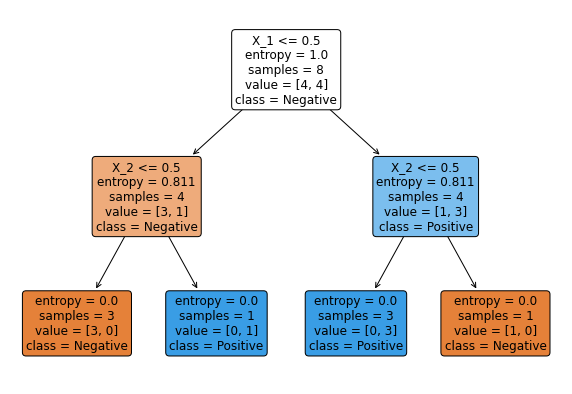

In [22]:
plt.figure(figsize=(10, 7))
tree.plot_tree(clf, 
               feature_names=list(X), 
               class_names=['Negative', 'Positive'], 
               filled=True,
               rounded=True,
               fontsize = 12)
plt.show()

https://stepik.org/lesson/223994/step/7?unit=196798

В нашем Big Data [датасэте](https://stepik.org/media/attachments/course/4852/cats.csv) появились новые наблюдения! Давайте немного посчитаем энтропию, чтобы лучше понять, формализуемость 
разделения на группы.
Формат записи - энтропия в группе, где переменная равна 0 и энтропия в группе, где переменная равна 1 (десятичный разделитель - 
точка, округляйте до 2-ого знака при необходимости).
И формула [энтропии](https://en.wikipedia.org/wiki/Entropy_(information_theory)):

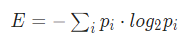

In [12]:
Image('.\Screens\Entropy.png')

In [17]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/cats.csv', index_col=0)
df.head()

,Шерстист,Гавкает,Лазает по деревьям,Вид
0,1,1,0,собачка
1,1,1,0,собачка
2,1,1,0,собачка
3,1,1,0,собачка
4,1,0,1,котик


In [29]:
import math as m

E_sh_0 = round((1/1) * m.log2((1/1)) - 0, 2)
E_sh_1 = round(- (4/9) * m.log2((4/9)) - (5/9) * m.log2((5/9)), 2)
E_gav_0 = round(0 - (5/5) * m.log2((5/5)), 2)
E_gav_1 = round(- (4/5) * m.log2((4/5)) - (1/5) * m.log2((1/5)), 2)
E_laz_0 = round(0 - (6/6) * m.log2((6/6)), 2)
E_laz_1 = round(- (4/4) * m.log2((4/4)) - 0, 2)

print(E_sh_0, E_sh_1, E_gav_0, E_gav_1, E_laz_0, E_laz_1)

0.0 0.99 0.0 0.72 0.0 -0.0


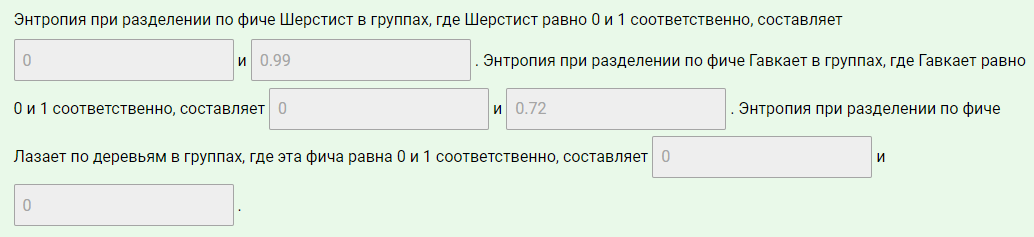

In [13]:
Image('.\Screens\Ans_2_2_2.png')

https://stepik.org/lesson/223994/step/8?unit=196798
    
Ещё немного арифметики - посчитаем Information Gain по данным из предыдущего задания. Впишите через пробел округлённые до 2-ого 
знака значения IG для фичей Шерстист, Гавкает и Лазает по деревьям. Десятичным разделителем в данном задании является точка.

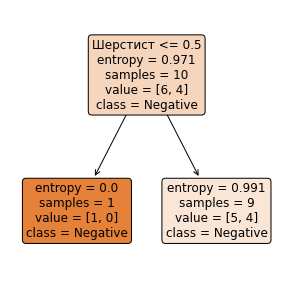

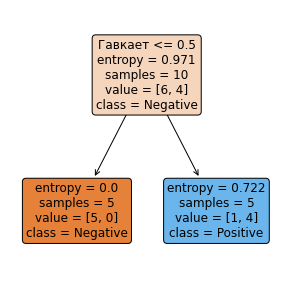

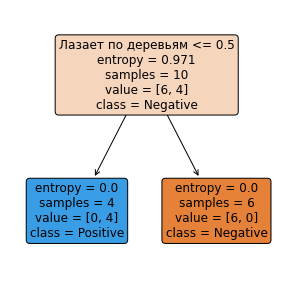

In [46]:
def plot_tree(i):
    clf = tree.DecisionTreeClassifier(criterion = 'entropy')
    X = df[i]
    y = df[['Вид']]
    clf.fit(X, y)
    
    plt.figure(figsize=(5, 5))
    tree.plot_tree(clf, 
               feature_names=list(X), 
               class_names=['Negative', 'Positive'], 
               filled=True,
               rounded=True,
               fontsize = 12)
    plt.show()


for i in [['Шерстист'], ['Гавкает'], ['Лазает по деревьям']]:
    plot_tree(i)

In [54]:
print(round(0.97 - 1/10 * 0 - 9/10 * 0.99, 2), round(0.97 - 5/10 * 0 - 5/10 * 0.72, 2), round(0.97 - 4/10 * 0 - 6/10 * 0, 2))

0.08 0.61 0.97


https://stepik.org/lesson/209691/step/6?unit=183195

Отметьте верные утверждения об обучении моделей

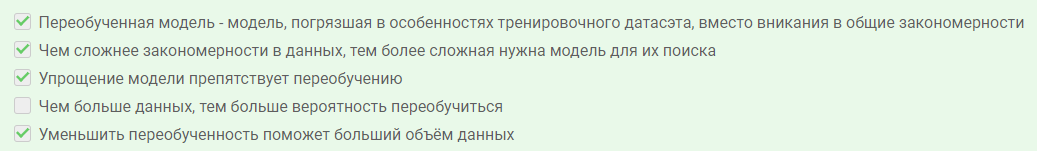

In [21]:
Image('.\Screens\Ans_2_4_1.png')

https://stepik.org/lesson/209691/step/9?unit=183195

Для чего нужно разделение на train, test и validation датасэты?

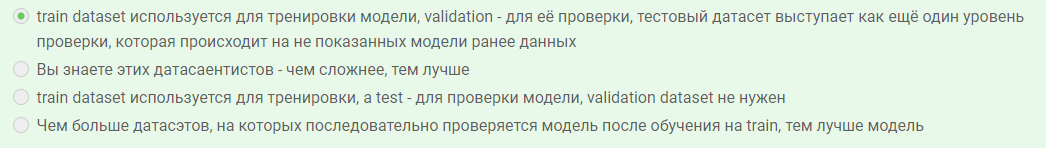

In [19]:
Image('.\Screens\Ans_2_4_2.png')

https://stepik.org/lesson/209691/step/12?unit=183195

Скачайте [тренировочный датасэт](https://stepik.org/media/attachments/course/4852/train_iris.csv) с ирисами, обучите деревья с глубиной от 1 до 100. Целевой переменной при обучении является 
переменная species. При этом записывайте его скор (DecisionTreeClassifier.score()) на тренировочных данных, и аккуратность 
предсказаний (accuracy_score) на [тестовом датасэте](https://stepik.org/media/attachments/course/4852/test_iris.csv). Затем визуализируйте зависимость скора и аккуратности предсказаний от 
глубины дерева и выберите правильную визуализацию из предложенных.
Важно: задайте random seed прямо перед созданием дерева или укажите его в параметрах дерева (random_state=rs)
`np.random.seed(0)
my_awesome_tree = DecisionTreeClassifier(...)`

или

`my_awesome_tree = DecisionTreeClassifier(random_state=0, ...)`

In [70]:
train_df = pd.read_csv('https://stepik.org/media/attachments/course/4852/train_iris.csv', index_col=0)
test_df = pd.read_csv('https://stepik.org/media/attachments/course/4852/test_iris.csv', index_col=0)
test_df.head()

,sepal length,sepal width,petal length,petal width,species
114,5.8,2.8,5.1,2.4,2
70,5.9,3.2,4.8,1.8,1
138,6.0,3.0,4.8,1.8,2
59,5.2,2.7,3.9,1.4,1
44,5.1,3.8,1.9,0.4,0


In [74]:
# создаем вектора для тренировочной и тестовой выборки

X_train = train_df.drop('species', axis=1)
X_test = test_df.drop('species', axis=1)

In [75]:
# создаем тренировочную и тестовую выборки для целевой переменной species

y_train = train_df.species
y_test = test_df.species

In [78]:
# определяем по условию параметр для ГСЧ и датафрейм для scores

rs = np.random.seed(0)
scores_data = pd.DataFrame()

In [79]:
# заполняем датафрейм scores для разной глубины решений

for depth in range(1, 100):
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=depth, random_state=rs)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    temp_score_data = pd.DataFrame({'max_depth': [depth], 
                                    'train_score': [train_score], 
                                    'test_score': [test_score]})
    scores_data = scores_data.append(temp_score_data)

scores_data.head()

,max_depth,train_score,test_score
0,1,0.70,0.60
0,2,0.97,0.94
0,3,0.99,0.94
0,4,1.00,0.92
0,5,1.00,0.92


In [82]:
# создаем новый датафрейм со scores преобразованием старого

scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], 
                           value_vars=['train_score', 'test_score'],
                           var_name='set_type', value_name='score')
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.70
1,2,train_score,0.97
2,3,train_score,0.99
3,4,train_score,1.00
4,5,train_score,1.00


<AxesSubplot:xlabel='max_depth', ylabel='score'>

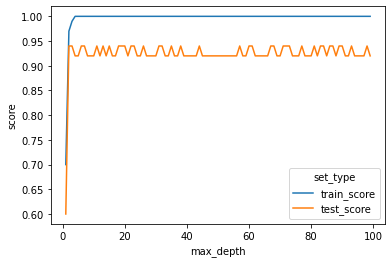

In [81]:
# визуализируем зависимость scores от глубины дерева (ответ - вариант 2)

sns.lineplot(x='max_depth', y='score', hue='set_type', data = scores_data_long)

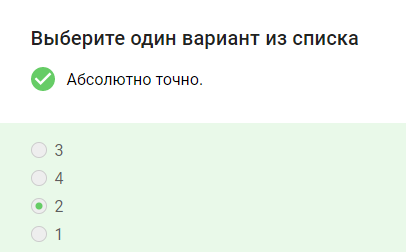

In [18]:
Image('.\Screens\Ans_2_4_3.png')

https://stepik.org/lesson/209691/step/15?unit=183195

Мы собрали побольше данных о котиках и собачках, и готовы обучить нашего робота их классифицировать! Скачайте [тренировочный 
датасэт](https://stepik.org/media/attachments/course/4852/dogs_n_cats.csv) и  обучите на нём Decision Tree. После этого скачайте датасэт из задания и предскажите какие наблюдения к кому 
относятся. Введите число собачек в вашем датасэте.
В задании допускается определённая погрешность.

In [83]:
train_df = pd.read_csv('https://stepik.org/media/attachments/course/4852/dogs_n_cats.csv')
train_df.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка


In [98]:
train_df.tail()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
995,8,3.2,1,0,1,котик
996,7,2.8,1,0,1,котик
997,6,2.4,1,0,1,котик
998,7,2.8,1,0,1,котик
999,11,4.4,1,0,1,котик


In [84]:
# смотрим форму датасета

train_df.shape

(1000, 6)

In [85]:
# проверяем, нет ли пропущенных значений в датасете

train_df.isnull().sum()

Длина                 0
Высота                0
Шерстист              0
Гавкает               0
Лазает по деревьям    0
Вид                   0
dtype: int64

In [86]:
# Создаем X-вектор

X = train_df.drop('Вид', axis=1)
X.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,15,18.0,1,1,0
1,20,24.0,1,0,0
2,34,40.8,1,1,0
3,26,31.2,1,1,0
4,16,19.2,1,1,0


In [87]:
# Заполняем выборку по целевой переменной (значения - котик или собачка)

y = train_df.Вид

In [88]:
# разбиваем выборки на тренировочную и тестовую (для обучения модели)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [89]:
# смотрим форму тренировочной выборки X

X_train.shape

(670, 5)

In [90]:
# смотрим форму тестовой выборки X

X_test.shape

(330, 5)

In [91]:
# обучаем модель на выборках

scores_data = pd.DataFrame()
for depth in range(1, 100):
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=depth, random_state=np.random)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    temp_score_data = pd.DataFrame({'max_depth': [depth], 
                                    'train_score': [train_score],
                                    'test_score': [test_score]})
    scores_data = scores_data.append(temp_score_data)

scores_data.head()

,max_depth,train_score,test_score
0,1,1.0,1.0
0,2,1.0,1.0
0,3,1.0,1.0
0,4,1.0,1.0
0,5,1.0,1.0


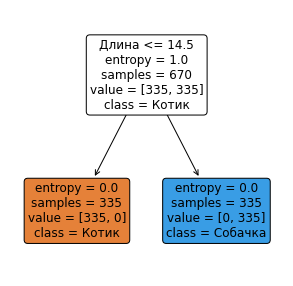

In [99]:
# разбираемся, почему получили такие scores
# оказывается, создатели курса пошутили над слушателями. Оказалось, что признак "Длина" однозначно делит выборку на кошечек
# и собачек. Котики более "короткие" :)

plt.figure(figsize=(5, 5))
tree.plot_tree(clf, 
           feature_names=list(X_train), 
           class_names=['Котик', 'Собачка'], 
           filled=True,
           rounded=True,
           fontsize = 12)
plt.show()

In [103]:
# самый "длинный" котик

train_df.query('Вид == "котик"').Длина.max

<bound method Series.max of 500    14
501     6
502     6
503     8
504     6
       ..
995     8
996     7
997     6
998     7
999    11
Name: Длина, Length: 500, dtype: int64>

In [104]:
# самая "короткая" собачка

train_df.query('Вид == "собачка"').Длина.min

<bound method Series.min of 0      15
1      20
2      34
3      26
4      16
       ..
495    34
496    34
497    20
498    19
499    26
Name: Длина, Length: 500, dtype: int64>

In [92]:
# загружаем тестовую выборку для предсказания количества собачек

X_test = pd.read_json('C:\\Users\\Nike\\dataset_209691_15.txt')
X_test.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,23,27.6,1,1,0
1,27,32.4,1,1,0
2,28,33.6,1,1,0
3,25,30.0,1,1,0
4,21,25.2,1,1,0


In [93]:
# сравниваем порядок столбцов тренировочной выборки с тестовой. Если бы не совпадали, их надо было бы привести в соответствие

X_train.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
703,13,5.2,1,0,1
311,34,40.8,1,1,0
722,5,2.0,1,1,0
629,9,3.6,1,0,1
0,15,18.0,1,1,0


In [95]:
# предсказываем значений целевой переменной по тестовой выборке

s = pd.Series(clf.predict(X_test))

In [96]:
# считаем количество собачек

s[s == 'собачка'].count()

47

https://stepik.org/lesson/209692/step/9?unit=183196
    
Возвращаемся к дэйтингу, некий Анатолий зарегистрировался в приложении знакомств, некий алгоритм на основе машинного обучения порекомендовал Анатолию 30 фотографий из 100. Анатолий лайкнул 15 фотографий из 30 предложенных, в дальнейшем выяснилось, что Анатолий мог бы лайкнуть еще 30 фотографий из 70 непредложенных.

Будем считать, что  лайк Анатолия является положительным исходом, а отсутствие лайка - отрицательным. Соответственно предсказанный лайк, совпавший с реальным - True positive, предсказанный лайк, не завершившийся реальным лайком - False positive и т. д. Давайте оценим работу алгоритма с точки зрения метрик качества модели.

                  | Predicted likes | Predicted dislikes
    --------------|-----------------|-------------------
    Real likes    | 15              | 30
    Real dislikes | 15              | 40

Такой формат представления предсказания модели и реальных исходов называется [confusion matrix](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html). Глядя на такую таблицу, легко можно понять, где именно ошибается наша модель. А также рассчитать различные метрики качества модели: [Precision](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score), [Recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score), [F1 score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html).

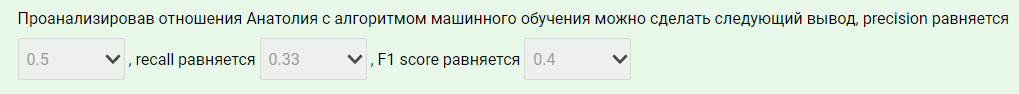

In [22]:
Image('.\Screens\Ans_2_5_1.png')

https://stepik.org/lesson/209692/step/10?unit=183196

Допустим, мы установили сканер отпечатков пальцев на вход в Институт биоинформатики, теперь любой студент может приложить палец и попасть внутрь. Однако сканер иногда допускает ошибки как первого так и второго рода. 

Служба охраны переживает и очень не хочет, чтобы посторонние люди были распознаны, как студенты. Какую метрику необходимо максимизировать в таком случае.

Будем считать, что
* True positive - студент института был действительно распознан как студент.
* False positive - не студент института был распознан как студент. 

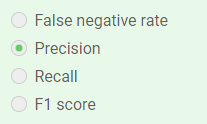

In [23]:
Image('.\Screens\Ans_2_5_2.png')

https://stepik.org/lesson/209692/step/11?unit=183196

Укажите какой параметр важнее в различных задачах. Помните, precision более важен в ситуациях, где не нужны ложные положительные срабатывания, а recall - там, где не нужны ложные отрицательные.

Например, если руководство страны пытается предотвратить эпидемию, и решило бесплатно выдавать лекарства всем заболевшим, то более важно будет покрыть всю заболевшую аудиторию == минимизировать случаи, когда больной считается здоровым == увеличить recall

Возможно чуть более понятная интерпретация этих метрик:
В поисковых системах, precision - соответствие выданной страницы запросу пользователя, а recall - доля выданных соответствующих страниц к доле всех соответствующих страниц.

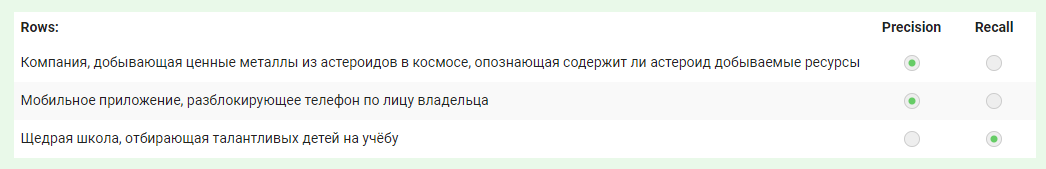

In [24]:
Image('.\Screens\Ans_2_5_3.png')

https://stepik.org/lesson/209692/step/12?unit=183196

Укажите верные высказывания:

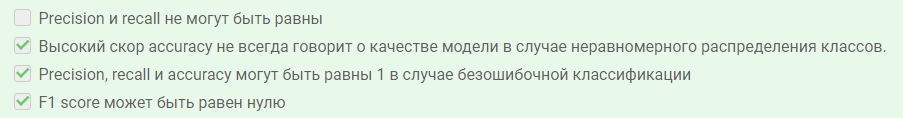

In [25]:
Image('.\Screens\Ans_2_5_4.png')

https://stepik.org/lesson/209692/step/13?unit=183196

Поупражняемся в расчётах precision. В задании даны переменные, содержащие информацию о песнях и артистах - X_train, y_train, 
X_test и y_test. Исходно в датасэтах содержались тексты песен, но Decision Tree работает с категориальными и числовыми 
переменными, а текст это... текст. Поэтому его необходимо преобразовать в понятную для модели форму. В данном случае для 
каждой песни просто посчитаны длина и количество некоторых знаков пунктуации.
Обучите модель на тренировочных данных, предскажите авторов для тестовых и поместите в переменную predictions. Затем 
посчитайте precision score на предсказаниях и y_test, укажите параметр average='micro', и сохраните результат в переменную 
precision.
Если он будет недостаточно высок, потюньте немного модель.
Исходные данные взяты [отсюда](https://www.kaggle.com/gyani95/380000-lyrics-from-metrolyrics), слегка процессированные можно взять [здесь](https://stepik.org/media/attachments/course/4852/songs.csv) (исходные колонки типа жанра, года были выкинуты в задании)

upd. Precision модели должна быть не менее 75%

In [24]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/songs.csv')
df.head()

,song,year,artist,genre,lyrics,length,commas,exclamations,colons,hyphens
0,the-ownerz,2007,gangstarr,Hip-Hop,"""One-two..""\n""One-two, shots to the chin.. kno...",1300,24,5,0,11
1,dead-sound-of-misery,2006,blind-guardian,Metal,It's dark\nLet's do it now\nBring in the siren...,1566,0,0,0,0
2,modred-s-song,2006,blind-guardian,Metal,I've lost my battle before it starts\nmy first...,996,1,0,1,0
3,the-ninth-wave,2015,blind-guardian,Metal,As dark night embraces\nWe are the nation\nI w...,2868,5,0,0,0
4,skills,2014,gangstarr,Hip-Hop,"Skills, skills, skills\n""My Microphone""\n""It's...",3351,22,0,0,3


In [25]:
# создадим вектор X дропнув лишние колонки

X = df.drop(['song', 'year', 'genre', 'lyrics', 'artist'], axis=1)

In [26]:
# создадим вектор Y, переведя исполнителя в цифру, для этого каждому присвоим свой номер

artists = list(df.artist)

i, s = 0, {}
for artist in set(artists):
    s[artist] = i
    i += 1
    
artists_int = []
for i in df.artist:
    artists_int.append(s[i])
    
y = pd.Series(artists_int)

In [27]:
# создадим тренировочный и тестовый наборы векторов X и значений Y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.39, random_state=42)

In [28]:
# подготовим таблицу scores на тестовой выборке (scores тренировочной решено не учитывать)

scores_data = pd.DataFrame()
for depth in range(1, 100):
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=depth)
    clf.fit(X_train, y_train)
    test_score = clf.score(X_test, y_test)
        
    temp_score_data = pd.DataFrame({'max_depth': [depth], 
                                    'test_score': [test_score]})
    scores_data = scores_data.append(temp_score_data)

In [29]:
# получим оптимальную глубину дерева решений для максимального значения scores
max_score = scores_data.test_score.max()
depth = scores_data.query('test_score == @max_score').max_depth.min()

In [30]:
# создадим класс дерева и заново обучим его на тренировочной выборке, указав оптимальную глубину дерева решений
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=depth)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [31]:
# предскажем Y для тестовой выборки X
predictions = clf.predict(X_test)

In [32]:
# рассчитаем точность модели
precision_score(y_test, predictions, average='micro')

0.7446808510638298

In [33]:
# предсказанные исполнители "в цифре"

predictions

array([1, 2, 1, 2, 1, 2, 2, 1, 0, 0, 1, 2, 0, 2, 2, 0, 1, 0, 0, 1, 1, 1,
       2, 0, 0, 1, 0, 0, 0, 1, 2, 0, 1, 2, 2, 2, 1, 2, 0, 0, 1, 0, 0, 1,
       0, 0, 2, 1, 2, 0, 1, 0, 0, 2, 2, 2, 2, 0, 0, 1, 0, 0, 1, 1, 0, 2,
       2, 2, 2, 0, 1, 1, 0, 2, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 2, 1,
       0, 2, 1, 1, 0, 0, 1, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 1, 0, 0,
       2, 2, 0, 2, 2, 0, 0, 2, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 2, 1, 2, 0,
       0, 2, 1, 2, 1, 2, 2, 2, 2], dtype=int64)

In [49]:
# предсказанные исполнители

for i in predictions:
    for k,a in s.items():
        if i == a:
            print(k, end=' ')

abba gangstarr abba gangstarr abba gangstarr gangstarr abba blind-guardian blind-guardian abba gangstarr blind-guardian gangstarr gangstarr blind-guardian abba blind-guardian blind-guardian abba abba abba gangstarr blind-guardian blind-guardian abba blind-guardian blind-guardian blind-guardian abba gangstarr blind-guardian abba gangstarr gangstarr gangstarr abba gangstarr blind-guardian blind-guardian abba blind-guardian blind-guardian abba blind-guardian blind-guardian gangstarr abba gangstarr blind-guardian abba blind-guardian blind-guardian gangstarr gangstarr gangstarr gangstarr blind-guardian blind-guardian abba blind-guardian blind-guardian abba abba blind-guardian gangstarr gangstarr gangstarr gangstarr blind-guardian abba abba blind-guardian gangstarr blind-guardian abba blind-guardian abba abba abba blind-guardian blind-guardian blind-guardian abba blind-guardian blind-guardian gangstarr abba blind-guardian gangstarr abba abba blind-guardian blind-guardian abba blind-guardian 

In [50]:
# создаем "пустое" дерево решений

clf = tree.DecisionTreeClassifier()

In [51]:
# создаем словарь с параметрами, которые нужно подобрать

parameters = {'criterion': ['gini', 'entropy'], 'max_depth': range(1,50)}

In [52]:
# создаем класс "комбайна", который будет подбирать нам параметры

crid_search_cv_clf = GridSearchCV(clf, parameters, cv=5)

In [53]:
# обучим этот классификатор на тренировочной выборке

crid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 50)})

In [55]:
# выведем параметры, для которых значение accuracy будет максимальным

crid_search_cv_clf.best_params_

{'criterion': 'gini', 'max_depth': 36}

In [56]:
# выберем и сохраним лучший классификатор

best_clf = crid_search_cv_clf.best_estimator_

In [64]:
# рассчитаем precision

precision_score(y_test, y_pred, average='weighted')

0.6444472256987901

In [65]:
# рассчитаем recall

recall_score(y_test, y_pred, average='weighted')

0.6524822695035462

https://stepik.org/lesson/209700/step/2?unit=183204

Начнём с простого - создайте [Decision Tree](http://scikit-learn.org/stable/modules/tree.html) классификатор, используя одноимённый класс из библиотеки sklearn и сохраните его в 
переменную dt.
У дерева должны быть следующие параметры:
* максимальная глубина - 5 уровней
* минимальное число образцов в вершине для разделения - 5

Подробнее узнать об имеющихся параметрах Decision Tree можно узнать в [документации](Подробнее узнать об имеющихся параметрах Decision Tree можно узнать в документации.).

In [2]:
dt = tree.DecisionTreeClassifier(max_depth=5, min_samples_split=5)

https://stepik.org/lesson/209700/step/3?unit=183204

Скачайте [набор данных](https://stepik.org/media/attachments/course/4852/train_data_tree.csv) с тремя переменными: sex, exang, num. Представьте, что при помощи дерева решений мы хотим 
классифицировать есть или нет у пациента заболевание сердца (переменная num), основываясь на двух признаках: пол (sex) и 
наличие/отсутсвие стенокардии (exang). Обучите [дерево решений](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) на этих данных, используйте entropy в качестве критерия.
Укажите, чему будет равняться значение Information Gain для переменной,  которая будет помещена в корень дерева.
В ответе необходимо указать число с точностью 3 знака после запятой.

In [52]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/train_data_tree.csv')
df.head()

,sex,exang,num
0,1,1,1
1,1,1,1
2,1,0,1
3,1,0,0
4,1,0,1


In [64]:
# сохраняем вектора X и y
X, y = df[['sex', 'exang']], df.num

In [65]:
# обучаем дерево не заморачиваясь на подбор лучшего значения параметра max_depth

clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=1)
clf.fit(X, y) 

DecisionTreeClassifier(criterion='entropy', max_depth=1)

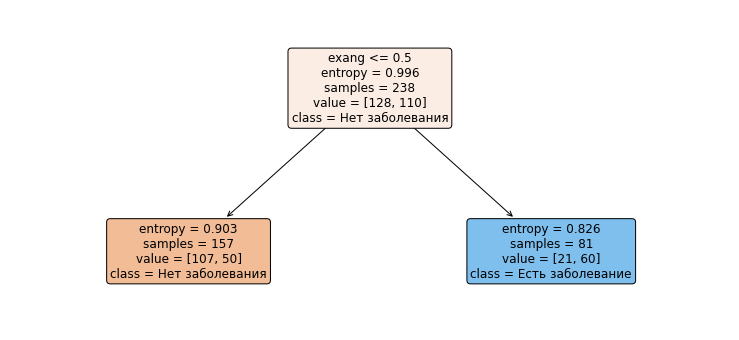

In [66]:
# визуализируем дерево (для наглядности + можно перепроверить расчет формулы)

plt.figure(figsize=(13, 6))
tree.plot_tree(clf, 
           feature_names=list(X), 
           class_names=['Нет заболевания', 'Есть заболевание'], 
           filled=True,
           rounded=True,
           fontsize = 12)
plt.show()

In [67]:
# считаем information gain по формуле: IG = 0.996 - (n0*E0 + n1*E1)/N
# где n0 - чило сэмплов слева, n1 - число сэмплов справа, E0 - энтропия слева, Е1 - энтропия справа, N = n0+n1 

p = {'n0': 0, 'E0': 0, 'n1': 0, 'E1': 0}
for i in (0, 1):
    l_node = clf.tree_.children_left[i] # индекс корня поддерева
    p['n' + str(i)] = clf.tree_.n_node_samples[l_node] # сэмплов в поддереве
    p['E' + str(i)] = clf.tree_.impurity[l_node] # энтропия в корне поддeрева

round(0.996 - (p['n0']*p['E0'] + p['n1']*p['E1']) / (p['n0'] + p['n1']), 3)

0.12

https://stepik.org/lesson/209700/step/4?unit=183204
    
Укажите верные утверждения

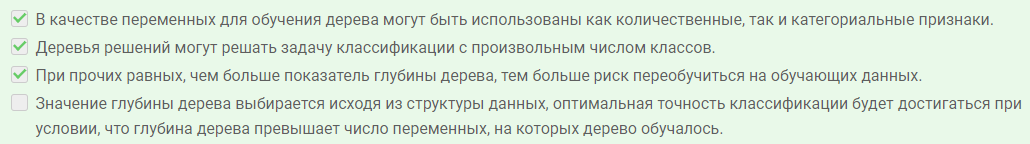

In [26]:
Image('.\Screens\Ans_2_7_3.png')

https://stepik.org/lesson/209700/step/5?unit=183204
    
[Ярослав](https://stepik.org/lesson/9249/step/10?course=%D0%9E%D1%81%D0%BD%D0%BE%D0%B2%D1%8B-%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B8&unit=1829) наконец-то освоил основы статистики и приступил к машинному обучению, однако, он вновь столкнулся с непреодолимыми трудностями, помогите Ярославу!

Ярослав обучил дерево решений на обучающей выборке и получил 100% точность классификатора, однако на тестовых данных точность классификатора едва превышала 50%, очевидно, что Ярослав пал жертвой переобучения.

Какие действия могут помочь в данной ситуации?

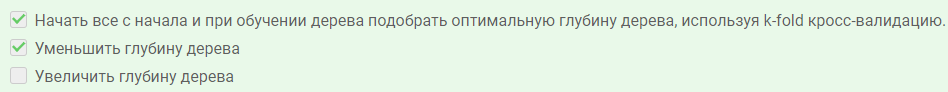

In [27]:
Image('.\Screens\Ans_2_7_4.png')

https://stepik.org/lesson/209700/step/6?unit=183204

Теперь, создав дерево, давайте обучим его и попробуем что-нибудь предсказать!
Для начала опробуем наше дерево на классическом наборе `iris`, где собраны данные о длине, ширине чашелистиков и лепестков 
ирисов и их принадлежности к виду. В sklearn он уже встроен, что довольно удобно.
Итак, вам даны 2 numpy array с измеренными признаками ирисов и их принадлежностью к виду. Сначала попробуем примитивный 
способ с разбиением данных на 2 датасэта. Используйте функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split) для разделения имеющихся данных на 
тренировочный и тестовый наборы данных, 75% и 25% соответственно.
Затем создайте дерево dt с параметрами по умолчанию и обучите его на тренировочных данных, а после предскажите классы, к 
которым принадлежат данные из тестовой выборки, сохраните результат предсказаний в переменную predicted.

In [68]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

In [78]:
# создадим тренировочный и тестовый наборы векторов X и значений Y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [79]:
# обучим деревце с параметрами по умолчанию

dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train) 

DecisionTreeClassifier()

In [80]:
# предскажем y на тестовых данных

predicted = dt.predict(X_test)

In [81]:
predicted

array([1, 2, 2, 2, 0, 2, 0, 0, 2, 1, 2, 1, 0, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 1, 1, 2, 1, 1, 0, 1, 0, 0, 0, 2, 0, 1, 2, 2])

https://stepik.org/lesson/209700/step/7?unit=183204
    
Теперь задачка на соотнесение функций sklearn и стратегий разделения датасэта для тестирования.

[Подсказка](http://scikit-learn.org/stable/modules/cross_validation.html)

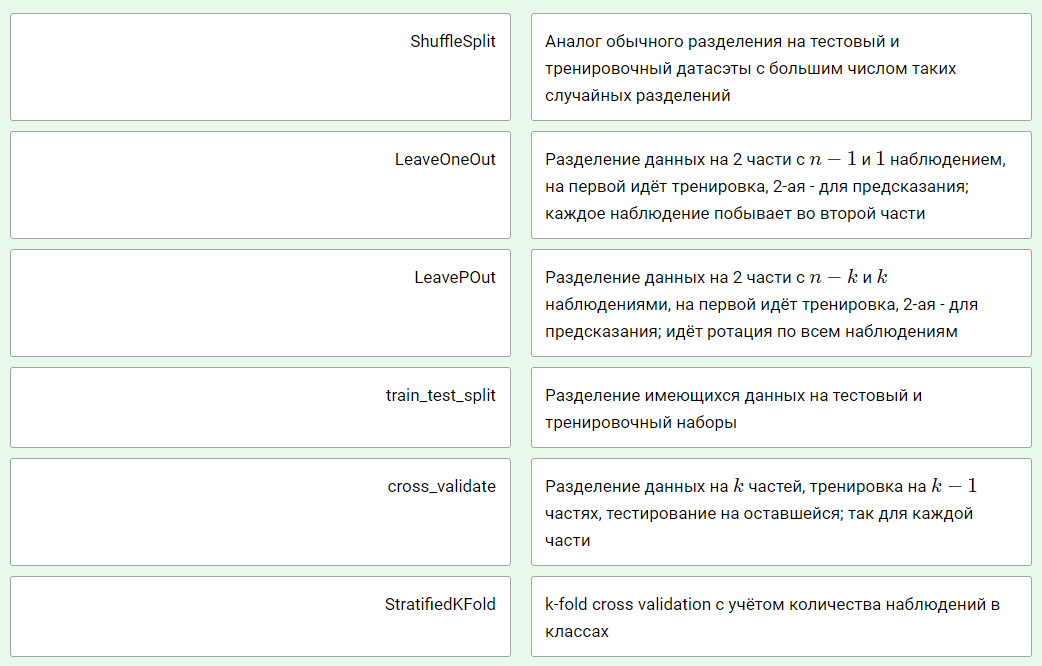

In [28]:
Image('.\Screens\Ans_2_7_6.png')

https://stepik.org/lesson/209700/step/8?unit=183204
    
В продолжение предыдущего вопроса - расположите разные стратегии разделения данных для кросс-валидации по затратам вычислительных мощностей на последующие предсказания. Сверху самый быстрый и требующий меньше всего вычислений для валидации.

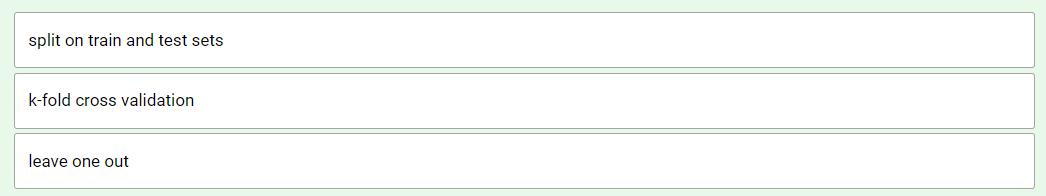

In [29]:
Image('.\Screens\Ans_2_7_7.png')

https://stepik.org/lesson/209700/step/10?unit=183204
    
Одно дерево - хорошо, но где гарантии, что оно является лучшим, или хотя бы близко к нему? Одним из способов найти более-менее оптимальный набор параметров дерева является перебор множества деревьев с разными параметрами и выбор подходящего.
Для этой цели существует класс GridSearchCV, перебирающий каждое из сочетаний параметров среди заданных для модели, обучающий её на данных и проводящих кросс-валидацию. После этого в аттрибуте .best_estimator_ храниться модель с лучшими параметрами.
Это применимо не только к деревьям, но и к другим моделям sklearn.

Теперь задание - осуществите перебор всех деревьев на данных ириса по следующим параметрам:
* максимальная глубина - от 1 до 10 уровней
* минимальное число проб для разделения - от 2 до 10
* минимальное число проб в листе - от 1 до 10

и сохраните в переменную best_tree лучшее дерево. Переменную с GridSearchCV назовите search

In [57]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

In [58]:
# создаем пустое дерево и определяем параметры

clf = tree.DecisionTreeClassifier()
parameters = {'max_depth': range(1,10), 'min_samples_split': range(2,10), 'min_samples_leaf': range(1,10)}

In [59]:
# обучаем на всех сочетаниях параметров с проведением кросс-валидации

search = GridSearchCV(clf, parameters)
search.fit(X, y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10)})

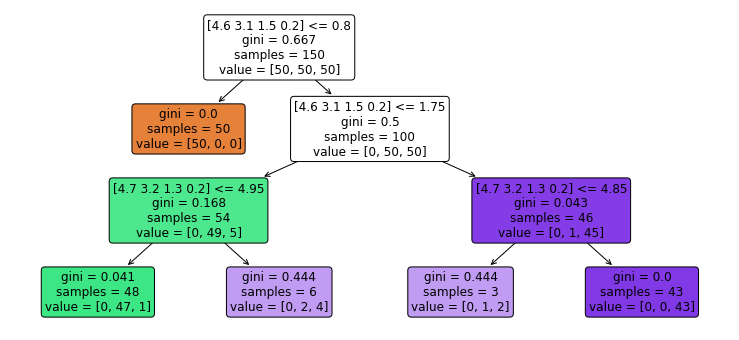

In [60]:
# сохраняем лучшую модель и визуализируем дерево решений

best_tree = search.best_estimator_

plt.figure(figsize=(13, 6))
tree.plot_tree(best_tree, 
           feature_names=list(X), 
           filled=True,
           rounded=True,
           fontsize = 12)
plt.show()

In [61]:
# выводим наилучшие параметры

search.best_params_

{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 4}

https://stepik.org/lesson/209700/step/11?unit=183204

Чем больше данных, сложность модели и число её параметров, тем дольше будет вестись поиск GridSearchCV. Однако бывают случаи, когда модель нужна здесь и сейчас, и для этого есть [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#sklearn.model_selection.RandomizedSearchCV)! Пробегаясь по рандомной подвыборке параметров, он ищет наиболее хорошую модель и делает это быстрее полного перебора параметров, хотя и может пропустить оптимальные параметры.

[Здесь](http://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html#sphx-glr-auto-examples-model-selection-plot-randomized-search-py) можно посмотреть на сравнение этих поисков.

Осуществим поиск по тем же параметрам что и в предыдущем задании с помощью RandomizedSearchCV

* максимальная глубина - от 1 до 10 уровней
* минимальное число проб для разделения - от 2 до 10
* минимальное число проб в листе - от 1 до 10

Cохраните в переменную best_tree лучшее дерево. Переменную с RandomizedSearchCV назовите search

In [62]:
from sklearn.model_selection import RandomizedSearchCV

iris = load_iris()
X = iris.data
y = iris.target

In [63]:
# создаем пустое дерево и определяем параметры

clf = tree.DecisionTreeClassifier()
parameters = {'max_depth': range(1,10), 'min_samples_split': range(2,10), 'min_samples_leaf': range(1,10)}

In [64]:
# обучаем наиболее хорошую модель на рандомной выборке параметров

search = RandomizedSearchCV(clf, parameters)
search.fit(X, y)

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': range(1, 10),
                                        'min_samples_leaf': range(1, 10),
                                        'min_samples_split': range(2, 10)})

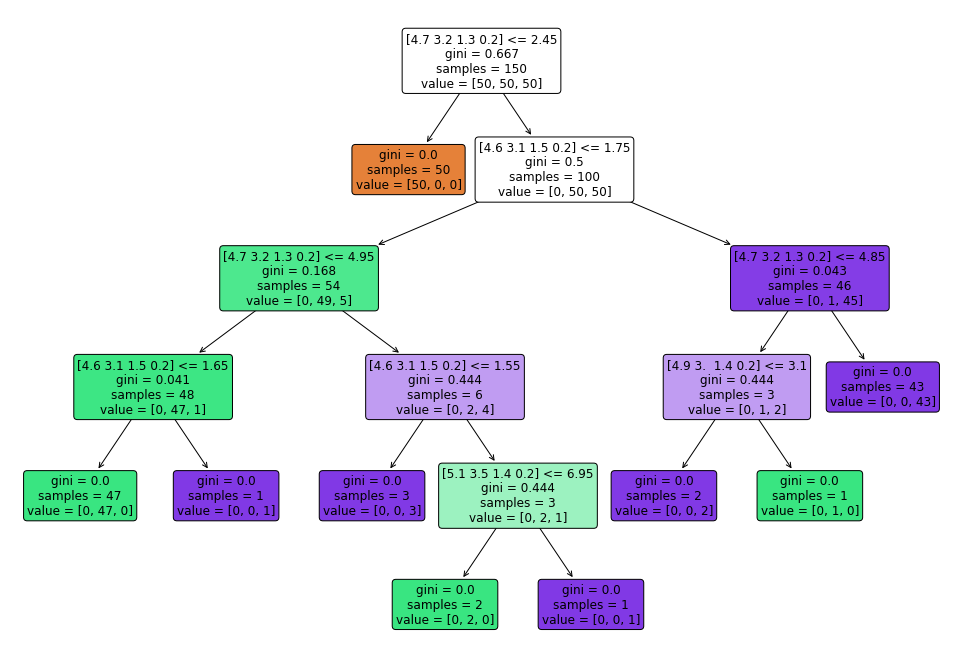

In [67]:
# сохраняем лучшую модель и визуализируем дерево решений

best_tree = search.best_estimator_

plt.figure(figsize=(17, 12))
tree.plot_tree(best_tree, 
           feature_names=list(X), 
           filled=True,
           rounded=True,
           fontsize = 12)
plt.show()

In [68]:
search.best_params_

{'min_samples_split': 3, 'min_samples_leaf': 1, 'max_depth': 7}

https://stepik.org/lesson/209700/step/12?unit=183204

Воспользуемся изученными приёмами и попредсказываем!

Даны 2 датасэта, к которым вы можете обращаться:

    train - размеченный с известными правильным ответами (хранятся в колонке y)
    test - набор, где нужно предсказать их
Найдите дерево с наиболее подходящими параметрами с помощью GridSearchCV и предскажите с его помощью ответы ко 2-ому сэту! Границы параметров как раньше:

* максимальная глубина - от 1 до 10 уровней
* минимальное число проб для разделения - от 2 до 10
* минимальное число проб в листе - от 1 до 10

Названия переменных тоже: лучшее дерево - best_tree, GridSearchCV - search, а предсказания - predictions

In [14]:
# промоделируем задачу на датасете с ирисами

from sklearn.datasets import load_iris

train_iris = load_iris()
X = train_iris.data
y = train_iris.target

In [4]:
# создадим тренировочный и тестовый наборы векторов X и значений Y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [6]:
# создаем пустое дерево и определяем параметры

clf = tree.DecisionTreeClassifier()
parameters = {'max_depth': range(1,10), 'min_samples_split': range(2,10), 'min_samples_leaf': range(1,10)}

In [7]:
# обучаем на всех сочетаниях параметров с проведением кросс-валидации

search = GridSearchCV(clf, parameters)
search.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10)})

In [10]:
# сохраняем лучшую модель и предсказываем Y

best_tree = search.best_estimator_
predictions = best_tree.predict(X_test)
predictions

array([2, 0, 0, 0, 1, 0, 2, 2, 1, 2, 1, 0, 2, 1, 0, 2, 0, 2, 0, 0, 0, 1,
       1, 1, 2, 0, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 0, 2, 0, 0, 1, 1, 0,
       2])

In [ ]:
# код "без ирисов"

clf = tree.DecisionTreeClassifier()
parameters = {'max_depth': range(1,10), 'min_samples_split': range(2,10), 'min_samples_leaf': range(1,10)}
search = GridSearchCV(clf, parameters)
search.fit(train.drop(['y'], axis=1), train.y)
best_tree = search.best_estimator_
predictions = best_tree.predict(test)

https://stepik.org/lesson/209700/step/13?unit=183204

При классификации модель может допускать ошибки, присваивая наблюдению неверный класс. Существуют различные метрики оценки качества предсказаний, которые базируются на 4-ёх параметрах - true positive, false positive, false negative и true negative, соответствующих тому какой класс был присвоен наблюдениям каждого из классов. Матрицу из 4-ёх (в случае бинарной классификации) этих параметров называют confusion matrix.

В sklearn можно её удобно получить с помощью функции [confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html). Вам даны 2 эррея с истинными классами наблюдений и предсказанными - y и predictions. Получите по ним confusion matrix и поместите её в переменную conf_matrix.

In [31]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_true=y_test, y_pred=predictions, labels = np.unique(y_test)[:2]) #labels позволяет 
# переопределить размер confusion matrix, выбрав subset из уникальных значений
conf_matrix

array([[15,  0],
       [ 0, 15]], dtype=int64)

In [ ]:
# код "без ирисов"

conf_matrix = confusion_matrix(y_true=y, y_pred=predictions)

https://stepik.org/lesson/209700/step/14?unit=183204

Соотнесите описание метрик, которые выводятся из 4-ёх основных параметров, с их названиями.

[help](https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/)

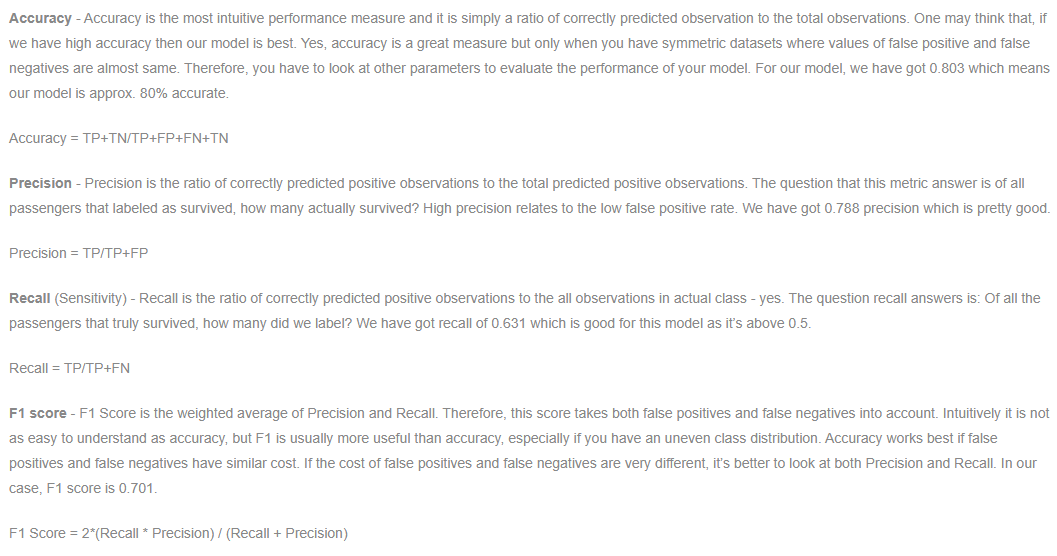

In [3]:
Image('.\Screens\Ans_2_7_12_2.png')

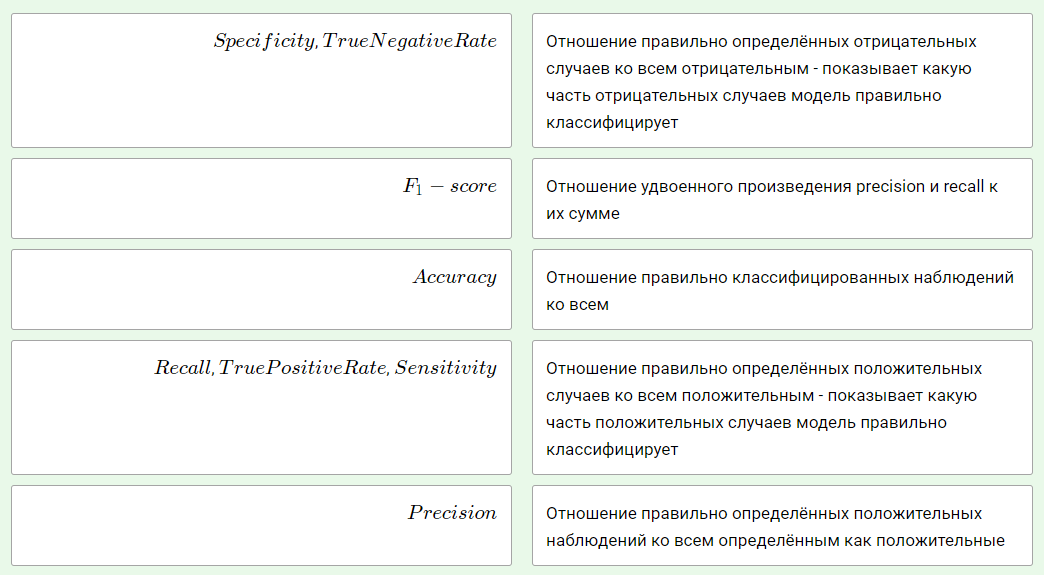

In [4]:
Image('.\Screens\Ans_2_7_12.png')